# Small-World Networks

This worksheet explores the formation of networks that result in the "small world" phenomenon - the idea that a person is only a couple of connections away from any other person in the world.

A popular example of the small world phenomenon is the network formed by actors appearing in the same movie (e.g., "Six Degrees of Kevin Bacon"), but small worlds are not limited to people-only networks. Other examples range from power grids to the neural networks of worms. This model illustrates some general, theoretical conditions under which small world networks between people or things might occur.

This model is an adaptation of the Watts-Strogatz model proposed by Duncan Watts and Steve Strogatz (1998). It begins with a *ring lattice* network where each node is connected to $k$ neighbours on either side. Using this a base, we then modify the network by rewiring edges – removing an edge from the graph and replacing it with an edge between two nodes sampled at random. Over time, we analyse the effect this rewiring has the on various connections between nodes and on the properties of the network.

Particularly, we're interested in identifying "small worlds." To identify small worlds, the *average path length* and *clustering coefficient* of the network are calculated and plotted after a rewiring is performed. Networks with short average path lengths and high clustering coefficients are considered small world networks.

![](watts_strogatz.png)


Lattice graphs have high clustering coefficients and high average path lengths, whereas random graphs have low clustering coefficients and small average path lengths.

Watts and Strogatz {cite}`watts1998collective` realised that by 'rewiring' a small number of edges in a lattice graph, the average path length decreases sharply, but clustering coefficients remain high. This property of short path distances and high clustering characterises a 'small world' graph.

In the following question you will write a script which performs the Watts-Strogatz small world simulation with directed graphs.

Let $L_{N,k}$ be the undirected ring lattice graph with $N$ nodes each connected to its $k$ closest neighbours.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Question 1
Write a function `get_lattice(N, k)` which returns an undirected ring lattice $L_{N,k}$ with $N$ nodes each connected to its $k$ closest neighbours.

In [2]:

def get_lattice(N, k):
    G = nx.Graph()
    edgelist = [((i+j) % N, i) for i in range(N) for j in range(1, k+1)]
    G.add_edges_from(edgelist)
    return G

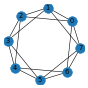

In [3]:
G = get_lattice(8, 2)
plt.figure(figsize=(3,3), dpi=25)
nx.draw(G, with_labels=True)

## Question 2

Write a function `rewire_edge(G, i, j)` which randomly rewires the start and end nodes of edge i of graph G. The function should remove the edge connecting nodes `i` and `j` then add a new edge connecting a *distinct* pair of random nodes.

In [4]:
def rewire_edge(G, i, j):
    u, v = np.random.choice(G.number_of_nodes(), 2, replace=False)
    G.remove_edge(i, j)
    G.add_edge(u, v)

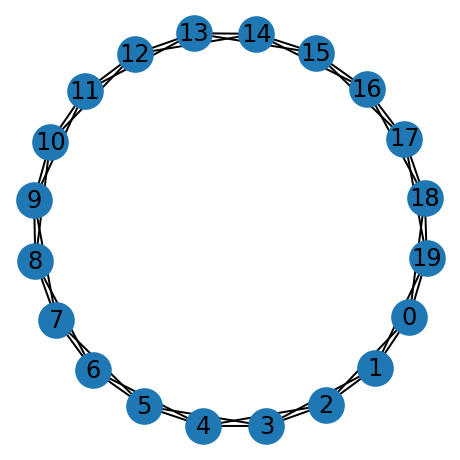

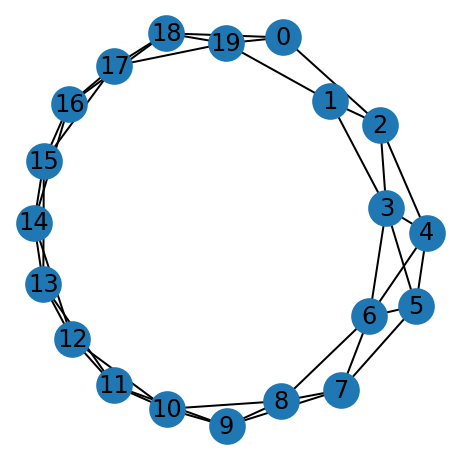

In [5]:
G = get_lattice(20, 2)
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True)

rewire_edge(G, 0, 1)
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True)

## Question 3

Write a function `rewire_graph(G, p)` which loops over all edges of graph `G`, rewiring each one with probability `p`.

In [6]:
def rewire_graph(G, p):
    for i,j in G.edges:
        if np.random.binomial(1, p):
            rewire_edge(G, i, j)

## Question 4

Choosing suitable values for `N` and `k`, write a script that generates a ring lattice graph, rewires the graph with given rewiring probability `p`, then calculates the average path length and global clustering coefficient. Amend your code so that `p` varies from `0` to `1`, and create arrays to store the average path length and global clustering coefficient for each value of `p`.

## Question 5

Create a figure which shows how average path length and global clustering co-efficient vary with rewiring probability. Experiment with different values of `N` and `k`. For what values of `p` does the resulting graph have small-world properties? Can you reproduce the figure from {cite}`watts1998collective`.